In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder, KBinsDiscretizer
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold
from scipy.stats import norm
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_predict

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
 

le prétraitement

In [38]:
df =pd.read_csv("test_Insurance.csv")
print(len(df))
df.head()

2147


,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,H3733,2013,1.0,0,V,V,V,U,3760.0,Fire-resistive,without,43157,oui
1,H16909,2015,1.0,0,V,N,O,R,1452.0,Fire-resistive,5,58194,non
2,H16867,2013,1.0,1,V,N,O,R,1944.0,Ordinary,6,92050,oui
3,H14813,2015,1.0,0,N,V,V,U,2270.0,Non-combustible,without,13209,oui
4,H3728,2016,0.5,0,V,N,O,R,2976.0,Fire-resistive,9,5177,non


In [39]:
df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2147 entries, 0 to 2146
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         2147 non-null   object 
 1   YearOfObservation   2147 non-null   int64  
 2   Insured_Period      2147 non-null   float64
 3   Residential         2147 non-null   int64  
 4   Building_Painted    2147 non-null   object 
 5   Building_Fenced     2147 non-null   object 
 6   Garden              2144 non-null   object 
 7   Settlement          2147 non-null   object 
 8   Building Dimension  2118 non-null   float64
 9   Building_Type       2147 non-null   object 
 10  NumberOfWindows     2147 non-null   object 
 11  Geo_Code            2118 non-null   object 
 12  Claim               2147 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 218.2+ KB


,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
count,2147,2147.000000,2147.000000,2147.000000,2147,2147,2144,2147,2118.000000,2147,2147,2118,2147
unique,2147,NaN,NaN,NaN,2,2,2,2,NaN,4,11,714,2
top,H3733,NaN,NaN,NaN,V,V,V,U,NaN,Non-combustible,without,6088,non
freq,1,NaN,NaN,NaN,1619,1074,1074,1074,NaN,995,1074,41,1639
mean,NaN,2013.691197,0.876805,0.315789,NaN,NaN,NaN,NaN,1899.700189,NaN,NaN,NaN,NaN
std,NaN,1.385631,0.215504,0.464938,NaN,NaN,NaN,NaN,2304.300053,NaN,NaN,NaN,NaN
min,NaN,2012.000000,0.500000,0.000000,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN
25%,NaN,2012.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,535.500000,NaN,NaN,NaN,NaN
50%,NaN,2013.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,1100.000000,NaN,NaN,NaN,NaN
75%,NaN,2015.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,2300.000000,NaN,NaN,NaN,NaN


In [40]:
print("le nombre total des valeurs null est", df.isnull().sum().sum())
print("\n le nombre des valeurs null pour chaque attribut= ",df.isnull().sum())
print("\n le nombre des valeurs dupliquer est= ",df.duplicated().sum())

le nombre total des valeurs null est 61

 le nombre des valeurs null pour chaque attribut=  Customer Id            0
YearOfObservation      0
Insured_Period         0
Residential            0
Building_Painted       0
Building_Fenced        0
Garden                 3
Settlement             0
Building Dimension    29
Building_Type          0
NumberOfWindows        0
Geo_Code              29
Claim                  0
dtype: int64

 le nombre des valeurs dupliquer est=  0


In [41]:
 l_num=list(df.select_dtypes(include="number"))
 l_discret=list(df.select_dtypes(include="object"))
 print("colonnes avec valeur numerique",l_num)
 print("colonnes avec valeur catégorielles",l_discret)

colonnes avec valeur numerique ['YearOfObservation', 'Insured_Period', 'Residential', 'Building Dimension']
colonnes avec valeur catégorielles ['Customer Id', 'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement', 'Building_Type', 'NumberOfWindows', 'Geo_Code', 'Claim']


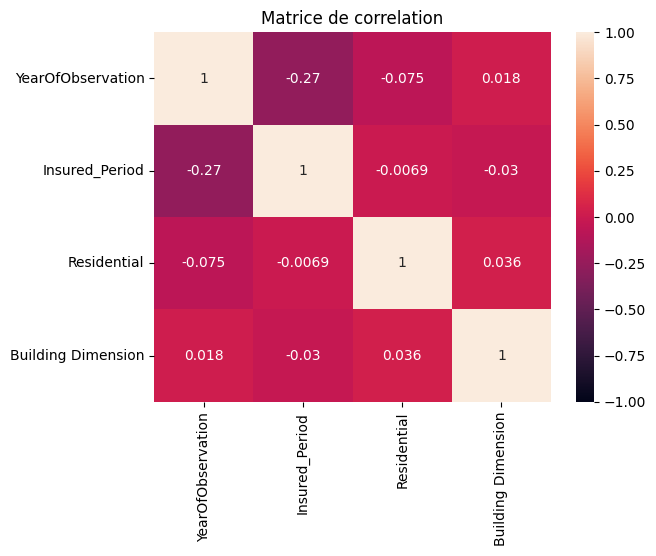

In [42]:
df_corr=df.corr(numeric_only=True)
sns.heatmap(df_corr,annot=True,vmin=-1,vmax=1)
plt.title('Matrice de correlation')
plt.show()

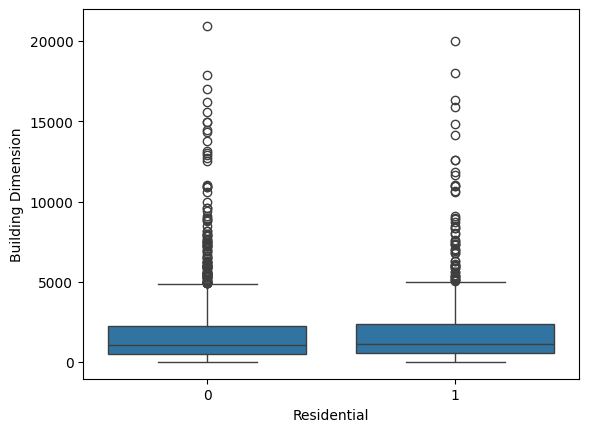

In [43]:
sns.boxplot(y='Building Dimension',x='Residential',data=df)
plt.show()

In [44]:
a=df[df["Residential"]==0]['Building Dimension'].median()
b=df[df["Residential"]==1]['Building Dimension'].median()

df['Building Dimension'].fillna(df['Residential'].apply(lambda x: a if x == 0 else b), inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_9836\368091205.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Building Dimension'].fillna(df['Residential'].apply(lambda x: a if x == 0 else b), inplace=True)


In [45]:
print("le nombre total des valeurs null est", df.isnull().sum().sum())
print("\n le nombre des valeurs null pour chaque attribut= ",df.isnull().sum())
print("\n le nombre des valeurs dupliquer est= ",df.duplicated().sum())

le nombre total des valeurs null est 32

 le nombre des valeurs null pour chaque attribut=  Customer Id            0
YearOfObservation      0
Insured_Period         0
Residential            0
Building_Painted       0
Building_Fenced        0
Garden                 3
Settlement             0
Building Dimension     0
Building_Type          0
NumberOfWindows        0
Geo_Code              29
Claim                  0
dtype: int64

 le nombre des valeurs dupliquer est=  0


In [46]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df[['Garden']]=imputer.fit_transform(df.loc[:,['Garden']])
df[['Geo_Code']]=imputer.fit_transform(df.loc[:,['Geo_Code']])  
print("\n le nombre des valeurs null pour chaque attribut= ",df.isnull().sum())

print(df.dtypes)


 le nombre des valeurs null pour chaque attribut=  Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
NumberOfWindows       0
Geo_Code              0
Claim                 0
dtype: int64
Customer Id            object
YearOfObservation       int64
Insured_Period        float64
Residential             int64
Building_Painted       object
Building_Fenced        object
Garden                 object
Settlement             object
Building Dimension    float64
Building_Type          object
NumberOfWindows        object
Geo_Code               object
Claim                  object
dtype: object


Geo_Code
10333    0.00
10362    0.00
10387    0.25
1053     0.00
11069    1.00
Name: Claim, dtype: float64
Geo_Code
6088     70
33063    40
13206    39
6083     30
83137    30
Name: count, dtype: int64
count    714.000000
mean       0.225475
std        0.350670
min        0.000000
25%        0.000000
50%        0.000000
75%        0.333333
max        1.000000
Name: Claim, dtype: float64


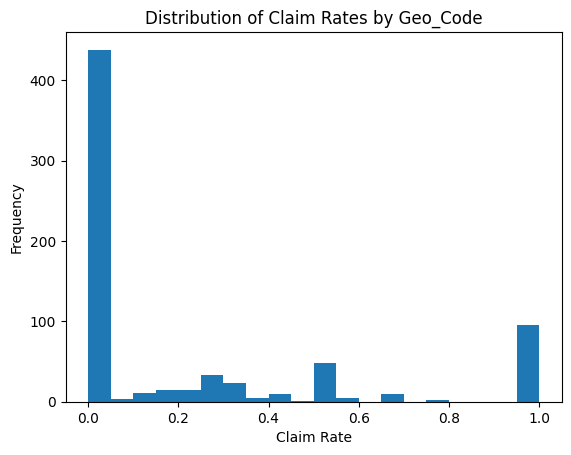

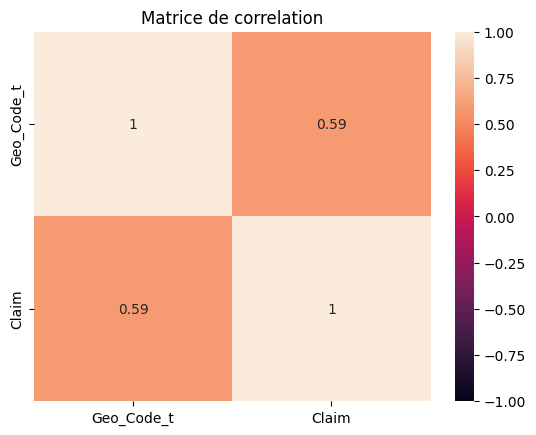

            Geo_Code_t     Claim
Geo_Code_t    1.000000  0.590208
Claim         0.590208  1.000000


In [47]:
enc = LabelEncoder()
df1=df
df1["Claim"]=enc.fit_transform(df.loc[:,"Claim"])
claim_column1 = df.pop('Claim')  
df1['Claim'] = claim_column1   
df1
claim_rate_by_geo = df1.groupby('Geo_Code')['Claim'].mean()
print(claim_rate_by_geo.head())
claim_rate_by_geo.describe()
geo_code_counts = df1['Geo_Code'].value_counts()
print(geo_code_counts.head())
print(claim_rate_by_geo.describe())
claim_rate_by_geo.plot(kind='hist', bins=20, title='Distribution of Claim Rates by Geo_Code')
plt.xlabel('Claim Rate')
plt.ylabel('Frequency')
plt.show()
df1['Geo_Code_t'] = df1['Geo_Code'].map(claim_rate_by_geo)

correlation = df1[['Geo_Code_t', 'Claim']].corr()
sns.heatmap(correlation,annot=True,vmin=-1,vmax=1)
plt.title('Matrice de correlation')
plt.show()
print(correlation)

In [48]:
#df.drop(labels=["Customer Id","Geo_Code"], axis=1, inplace=True)
claim_rate_by_geo = df.groupby('Geo_Code')['Claim'].mean()
df['Geo_Code_t'] = df['Geo_Code'].map(claim_rate_by_geo)
df.drop(labels=["Customer Id","Geo_Code"], axis=1, inplace=True)
###df.drop(labels=["Customer Id","Geo_Code","Geo_Code_t"], axis=1, inplace=True)

In [49]:
def adjust_outliers(dff, col):
 Q1,Q3=np.percentile(dff[col], [25,75])
 IQR=Q3-Q1
 upper_limit=Q3+1.5*IQR
 lower_limit=Q1-1.5*IQR
 dff[col]=np.where(dff[col]>upper_limit, upper_limit, np.where(dff[col]<lower_limit, lower_limit,dff[col]))

In [50]:
df['NumberOfWindows'] = df['NumberOfWindows'].replace('without', 0)
adjust_outliers(df, "Building Dimension")
adjust_outliers(df, "YearOfObservation")
adjust_outliers(df, "Insured_Period")
adjust_outliers(df, "Residential")

In [51]:
enc = LabelEncoder()
df["Building_Painted"]=enc.fit_transform(df.loc[:,"Building_Painted"])
df["Building_Fenced"]=enc.fit_transform(df.loc[:,"Building_Fenced"])
df["Garden"]=enc.fit_transform(df.loc[:,"Garden"])
df["Settlement"]=enc.fit_transform(df.loc[:,"Settlement"])
df


,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Claim,Geo_Code_t
0,2013.0,1.0,0.0,1,1,1,1,3760.0,Fire-resistive,0,1,0.375000
1,2015.0,1.0,0.0,1,0,0,0,1452.0,Fire-resistive,5,0,0.000000
2,2013.0,1.0,1.0,1,0,0,0,1944.0,Ordinary,6,1,0.250000
3,2015.0,1.0,0.0,0,1,1,1,2270.0,Non-combustible,0,1,0.500000
4,2016.0,1.0,0.0,1,0,0,0,2976.0,Fire-resistive,9,0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...
2142,2016.0,1.0,1.0,1,0,0,0,862.0,Wood-framed,2,0,0.222222
2143,2012.0,1.0,0.0,1,1,1,1,1050.0,Non-combustible,0,0,0.228571
2144,2014.0,1.0,0.0,1,0,0,0,730.0,Non-combustible,3,0,0.000000
2145,2014.0,1.0,1.0,0,1,1,1,568.0,Non-combustible,0,1,0.166667


In [52]:
enc = OneHotEncoder(sparse_output=False, categories=[["Fire-resistive", "Non-combustible","Ordinary","Wood-framed"]])
df[["Fire-resistive","Non-combustible","Ordinary","Wood-framed"]]=enc.fit_transform(df.loc[:,["Building_Type"]])
df.drop(labels=["Building_Type"], axis=1, inplace=True)
df

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,NumberOfWindows,Claim,Geo_Code_t,Fire-resistive,Non-combustible,Ordinary,Wood-framed
0,2013.0,1.0,0.0,1,1,1,1,3760.0,0,1,0.375000,1.0,0.0,0.0,0.0
1,2015.0,1.0,0.0,1,0,0,0,1452.0,5,0,0.000000,1.0,0.0,0.0,0.0
2,2013.0,1.0,1.0,1,0,0,0,1944.0,6,1,0.250000,0.0,0.0,1.0,0.0
3,2015.0,1.0,0.0,0,1,1,1,2270.0,0,1,0.500000,0.0,1.0,0.0,0.0
4,2016.0,1.0,0.0,1,0,0,0,2976.0,9,0,0.333333,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2142,2016.0,1.0,1.0,1,0,0,0,862.0,2,0,0.222222,0.0,0.0,0.0,1.0
2143,2012.0,1.0,0.0,1,1,1,1,1050.0,0,0,0.228571,0.0,1.0,0.0,0.0
2144,2014.0,1.0,0.0,1,0,0,0,730.0,3,0,0.000000,0.0,1.0,0.0,0.0
2145,2014.0,1.0,1.0,0,1,1,1,568.0,0,1,0.166667,0.0,1.0,0.0,0.0


In [53]:
enc = LabelEncoder()
df["Claim"]=enc.fit_transform(df.loc[:,"Claim"])
claim_column = df.pop('Claim')  
df['Claim'] = claim_column  
df

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,NumberOfWindows,Geo_Code_t,Fire-resistive,Non-combustible,Ordinary,Wood-framed,Claim
0,2013.0,1.0,0.0,1,1,1,1,3760.0,0,0.375000,1.0,0.0,0.0,0.0,1
1,2015.0,1.0,0.0,1,0,0,0,1452.0,5,0.000000,1.0,0.0,0.0,0.0,0
2,2013.0,1.0,1.0,1,0,0,0,1944.0,6,0.250000,0.0,0.0,1.0,0.0,1
3,2015.0,1.0,0.0,0,1,1,1,2270.0,0,0.500000,0.0,1.0,0.0,0.0,1
4,2016.0,1.0,0.0,1,0,0,0,2976.0,9,0.333333,1.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2142,2016.0,1.0,1.0,1,0,0,0,862.0,2,0.222222,0.0,0.0,0.0,1.0,0
2143,2012.0,1.0,0.0,1,1,1,1,1050.0,0,0.228571,0.0,1.0,0.0,0.0,0
2144,2014.0,1.0,0.0,1,0,0,0,730.0,3,0.000000,0.0,1.0,0.0,0.0,0
2145,2014.0,1.0,1.0,0,1,1,1,568.0,0,0.166667,0.0,1.0,0.0,0.0,1


In [54]:
print("\n le nombre des valeurs null pour chaque attribut= ",df.isnull().sum())

df['NumberOfWindows'] = df['NumberOfWindows'].replace('without', 0)

print(df['NumberOfWindows'].unique())
df['NumberOfWindows'] = df['NumberOfWindows'].replace('>=10', 10)  
df['NumberOfWindows'] = df['NumberOfWindows'].fillna(df['NumberOfWindows'].mode()[0])
df['NumberOfWindows'] = df['NumberOfWindows'].astype(float)
print(df['NumberOfWindows'].unique())

print(df.dtypes)




 le nombre des valeurs null pour chaque attribut=  YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
NumberOfWindows       0
Geo_Code_t            0
Fire-resistive        0
Non-combustible       0
Ordinary              0
Wood-framed           0
Claim                 0
dtype: int64
[0 '5' '6' '9' '7' '3' '8' '4' '1' '2' '>=10']
[ 0.  5.  6.  9.  7.  3.  8.  4.  1.  2. 10.]
YearOfObservation     float64
Insured_Period        float64
Residential           float64
Building_Painted        int32
Building_Fenced         int32
Garden                  int32
Settlement              int32
Building Dimension    float64
NumberOfWindows       float64
Geo_Code_t            float64
Fire-resistive        float64
Non-combustible       float64
Ordinary              float64
Wood-framed           float64
Claim                   int64
dtype: object


model2 : LogisticRegression

In [55]:
import joblib
model2 = joblib.load('model2.pkl')

In [56]:
X_test = df.drop('Claim', axis=1)
print(X_test.dtypes)
predictions = model2.predict(X_test)

YearOfObservation     float64
Insured_Period        float64
Residential           float64
Building_Painted        int32
Building_Fenced         int32
Garden                  int32
Settlement              int32
Building Dimension    float64
NumberOfWindows       float64
Geo_Code_t            float64
Fire-resistive        float64
Non-combustible       float64
Ordinary              float64
Wood-framed           float64
dtype: object


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [57]:
y_test = df['Claim']

In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

MAE: 0.2394038192827201
MSE: 0.2394038192827201
RMSE: 0.4892890958142436


In [59]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.76059618071728
Precision: 0.8297305391719022
Recall: 0.76059618071728
F1 Score: 0.7767574324160794


A high accuracy in a classification task means the model correctly predicted most labels.
A low MSE or RMSE in a regression task indicates the model's predictions are close to the actual values.

In [60]:
df

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,NumberOfWindows,Geo_Code_t,Fire-resistive,Non-combustible,Ordinary,Wood-framed,Claim
0,2013.0,1.0,0.0,1,1,1,1,3760.0,0.0,0.375000,1.0,0.0,0.0,0.0,1
1,2015.0,1.0,0.0,1,0,0,0,1452.0,5.0,0.000000,1.0,0.0,0.0,0.0,0
2,2013.0,1.0,1.0,1,0,0,0,1944.0,6.0,0.250000,0.0,0.0,1.0,0.0,1
3,2015.0,1.0,0.0,0,1,1,1,2270.0,0.0,0.500000,0.0,1.0,0.0,0.0,1
4,2016.0,1.0,0.0,1,0,0,0,2976.0,9.0,0.333333,1.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2142,2016.0,1.0,1.0,1,0,0,0,862.0,2.0,0.222222,0.0,0.0,0.0,1.0,0
2143,2012.0,1.0,0.0,1,1,1,1,1050.0,0.0,0.228571,0.0,1.0,0.0,0.0,0
2144,2014.0,1.0,0.0,1,0,0,0,730.0,3.0,0.000000,0.0,1.0,0.0,0.0,0
2145,2014.0,1.0,1.0,0,1,1,1,568.0,0.0,0.166667,0.0,1.0,0.0,0.0,1


test de prediction : 

Observation est une dataframe sans l'attribut Claim. Elle sera utilisée pour tester les modèles afin de générer les prédictions de la classe Claim. Commentaire correspond au résultat attendu, c'est-à-dire la valeur réelle de la classe Claim, qui permet de comparer et d'évaluer les prédictions du modèle.

In [61]:
observations = np.array([
   [2013.0, 1.0, 0.0, 1, 1, 1, 1, 3760.0, 0.0,0.375000, 1.0,0.0,0.0,0.0],     #1
   [ 2015.0,1.0	,0.0,	1	,0	,0,	0	,1452.0,	5.0,0.000000,	1.0	,0.0	,0.0,	0.0	], #0
   [2013.0,	1.0,	1.0,	1,	0	,0	,0	,1944.0,	6.0	,0.250000,0.0,	0.0	,1.0,	0.0],#1
   [2015.0,1.0	,0.0	,0,	1,	1	,1	,2270.0,	0.0	,0.500000,0.0,	1.0,	0.0	,0.0] ,#1
   [2016.0,	1.0,	0.0,	1,	0,	0	,0,	2976.0,	9.0	,0.333333,1.0,	0.0,	0.0,	0.0	]#0
])

In [62]:

print("LogisticRegression:")
print()
resultatJ = ["résultat attendu pour observation 1 : 1", "résultat attendu pour observation 2 : 0", "résultat attendu pour observation 3 : 1","résultat attendu pour observation 4 : 1","résultat attendu pour observation 5 : 0"]
for j in resultatJ:
    print(j)
print()
predictions1 = model2.predict(observations)
for i, prediction in enumerate(predictions1, 1):
    print(f"Prediction for Observation {i}: {prediction}")

LogisticRegression:

résultat attendu pour observation 1 : 1
résultat attendu pour observation 2 : 0
résultat attendu pour observation 3 : 1
résultat attendu pour observation 4 : 1
résultat attendu pour observation 5 : 0

Prediction for Observation 1: 1
Prediction for Observation 2: 0
Prediction for Observation 3: 1
Prediction for Observation 4: 1
Prediction for Observation 5: 1


In [63]:


import joblib
cls1 = joblib.load('cls1.pkl')
print("DecisionTreeClassifier:")
print()
resultatJ = ["résultat attendu pour observation 1 : 1", "résultat attendu pour observation 2 : 0", "résultat attendu pour observation 3 : 1","résultat attendu pour observation 4 : 1","résultat attendu pour observation 5 : 0"]
for j in resultatJ:
    print(j)
print()
predictions2 = cls1.predict(observations)
for i, prediction in enumerate(predictions2, 1):
    print(f"Prediction for Observation {i}: {prediction}")

DecisionTreeClassifier:

résultat attendu pour observation 1 : 1
résultat attendu pour observation 2 : 0
résultat attendu pour observation 3 : 1
résultat attendu pour observation 4 : 1
résultat attendu pour observation 5 : 0

Prediction for Observation 1: 1
Prediction for Observation 2: 0
Prediction for Observation 3: 0
Prediction for Observation 4: 1
Prediction for Observation 5: 1


In [64]:
import joblib
model1 = joblib.load('model1.pkl')
print("RandomForestClassifier:")
print()
resultatJ = ["résultat attendu pour observation 1 : 1", "résultat attendu pour observation 2 : 0", "résultat attendu pour observation 3 : 1","résultat attendu pour observation 4 : 1","résultat attendu pour observation 5 : 0"]
for j in resultatJ:
    print(j)
print()
predictions3 = model1.predict(observations)
for i, prediction in enumerate(predictions3, 1):
    print(f"Prediction for Observation {i}: {prediction}")

RandomForestClassifier:

résultat attendu pour observation 1 : 1
résultat attendu pour observation 2 : 0
résultat attendu pour observation 3 : 1
résultat attendu pour observation 4 : 1
résultat attendu pour observation 5 : 0

Prediction for Observation 1: 1
Prediction for Observation 2: 0
Prediction for Observation 3: 0
Prediction for Observation 4: 1
Prediction for Observation 5: 0


In [65]:
import joblib
model3 = joblib.load('model3.pkl')
print("KNeighborsClassifier:")
print()
resultatJ = ["résultat attendu pour observation 1 : 1", "résultat attendu pour observation 2 : 0", "résultat attendu pour observation 3 : 1","résultat attendu pour observation 4 : 1","résultat attendu pour observation 5 : 0"]
for j in resultatJ:
    print(j)
print()
predictions4 = model3.predict(observations)
for i, prediction in enumerate(predictions4, 1):
    print(f"Prediction for Observation {i}: {prediction}")

KNeighborsClassifier:

résultat attendu pour observation 1 : 1
résultat attendu pour observation 2 : 0
résultat attendu pour observation 3 : 1
résultat attendu pour observation 4 : 1
résultat attendu pour observation 5 : 0

Prediction for Observation 1: 1
Prediction for Observation 2: 1
Prediction for Observation 3: 0
Prediction for Observation 4: 0
Prediction for Observation 5: 1


In [66]:
import joblib
model4 = joblib.load('model4.pkl')
print("SVC:")
print()
resultatJ = ["résultat attendu pour observation 1 : 1", "résultat attendu pour observation 2 : 0", "résultat attendu pour observation 3 : 1","résultat attendu pour observation 4 : 1","résultat attendu pour observation 5 : 0"]
for j in resultatJ:
    print(j)
print()
predictions5 = model4.predict(observations)
for i, prediction in enumerate(predictions5, 1):
    print(f"Prediction for Observation {i}: {prediction}")

SVC:

résultat attendu pour observation 1 : 1
résultat attendu pour observation 2 : 0
résultat attendu pour observation 3 : 1
résultat attendu pour observation 4 : 1
résultat attendu pour observation 5 : 0

Prediction for Observation 1: 1
Prediction for Observation 2: 0
Prediction for Observation 3: 1
Prediction for Observation 4: 1
Prediction for Observation 5: 1


L'Accuracy, la Précision, le Recall et le F1-Score de chaque modèle.

cls1: DecisionTreeClassifier

In [67]:
X_test = df.drop('Claim', axis=1)
predictions2 = cls1.predict(X_test)
accuracy = accuracy_score(y_test, predictions2)
precision = precision_score(y_test, predictions2, average='weighted')
recall = recall_score(y_test, predictions2, average='weighted')
f1 = f1_score(y_test, predictions2, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7517466231951561
Precision: 0.7685116810124325
Recall: 0.7517466231951561
F1 Score: 0.7586558242034188


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


model 1 : RandomForestClassifier

In [68]:
X_test = df.drop('Claim', axis=1)
predictions3 = model1.predict(X_test)
accuracy = accuracy_score(y_test, predictions3)
precision = precision_score(y_test, predictions3, average='weighted')
recall = recall_score(y_test, predictions3, average='weighted')
f1 = f1_score(y_test, predictions3, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8062412668840242
Precision: 0.8027071204296635
Recall: 0.8062412668840242
F1 Score: 0.8043162126925654


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


model2 : LogisticRegression

In [69]:
X_test = df.drop('Claim', axis=1)
predictions = model2.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.76059618071728
Precision: 0.8297305391719022
Recall: 0.76059618071728
F1 Score: 0.7767574324160794


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


model3 : KNeighborsClassifier

In [70]:
X_test = df.drop('Claim', axis=1)
predictions4 = model3.predict(X_test)
accuracy = accuracy_score(y_test, predictions4)
precision = precision_score(y_test, predictions4, average='weighted')
recall = recall_score(y_test, predictions4, average='weighted')
f1 = f1_score(y_test, predictions4, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.5896599906846763
Precision: 0.6935083121853013
Recall: 0.5896599906846763
F1 Score: 0.6197760461565797


model4 : SVC

In [71]:
X_test = df.drop('Claim', axis=1)
predictions5 = model4.predict(X_test)
accuracy = accuracy_score(y_test, predictions5)
precision = precision_score(y_test, predictions5, average='weighted')
recall = recall_score(y_test, predictions5, average='weighted')
f1 = f1_score(y_test, predictions5, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Accuracy: 0.6823474615742897
Precision: 0.7435900068023842
Recall: 0.6823474615742897
F1 Score: 0.7019792078394425
